## Total particle counts from OPC

In [ ]:
import act
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

username = 'rppoland18'
token = '3127641b73e77c24'
datastream = 'gucaosopcS2.b1'
startdate = '2021-10-27'
enddate = '2023-06-16'

result = act.discovery.download_arm_data(username, token, datastream, startdate, enddate)

[DOWNLOADING] gucaosopcS2.b1.20221203.000004.nc
[DOWNLOADING] gucaosopcS2.b1.20221204.000005.nc
[DOWNLOADING] gucaosopcS2.b1.20221206.000000.nc
[DOWNLOADING] gucaosopcS2.b1.20221205.000005.nc
[DOWNLOADING] gucaosopcS2.b1.20230416.000004.nc
[DOWNLOADING] gucaosopcS2.b1.20221202.000003.nc
[DOWNLOADING] gucaosopcS2.b1.20230613.042214.nc
[DOWNLOADING] gucaosopcS2.b1.20221201.000002.nc
[DOWNLOADING] gucaosopcS2.b1.20221201.192954.nc
[DOWNLOADING] gucaosopcS2.b1.20230211.000005.nc
[DOWNLOADING] gucaosopcS2.b1.20230614.000005.nc
[DOWNLOADING] gucaosopcS2.b1.20230415.000003.nc
[DOWNLOADING] gucaosopcS2.b1.20230615.000000.nc
[DOWNLOADING] gucaosopcS2.b1.20221206.034912.nc
[DOWNLOADING] gucaosopcS2.b1.20221207.000004.nc
[DOWNLOADING] gucaosopcS2.b1.20221209.000000.nc
[DOWNLOADING] gucaosopcS2.b1.20221105.000004.nc
[DOWNLOADING] gucaosopcS2.b1.20221104.000003.nc
[DOWNLOADING] gucaosopcS2.b1.20221108.000003.nc
[DOWNLOADING] gucaosopcS2.b1.20221026.000001.nc
[DOWNLOADING] gucaosopcS2.b1.20221105.05

In [6]:
opc = act.io.read_arm_netcdf(result)
list(opc)

<xarray.Dataset> Size: 11GB
Dimensions:                      (time: 8504925, bound: 2, diameter_midpoint: 31)
Coordinates:
  * time                         (time) datetime64[ns] 68MB 2021-10-27T17:29:...
  * diameter_midpoint            (diameter_midpoint) float32 124B 0.2746 ... ...
Dimensions without coordinates: bound
Data variables: (12/36)
    base_time                    (time) datetime64[ns] 68MB 2021-10-27 ... 20...
    time_offset                  (time) datetime64[ns] 68MB 2021-10-27T17:29:...
    time_bounds                  (time, bound) object 136MB dask.array<chunksize=(105, 2), meta=np.ndarray>
    diameter_midpoint_bounds     (time, diameter_midpoint, bound) float32 2GB dask.array<chunksize=(105, 31, 2), meta=np.ndarray>
    gravimetric_factor           (time) float32 34MB dask.array<chunksize=(105,), meta=np.ndarray>
    error_code                   (time) float64 68MB dask.array<chunksize=(105,), meta=np.ndarray>
    ...                           ...
    zero_count_da

Text(0.5, 1.0, 'Total concentration 0-33 um (OPC)')

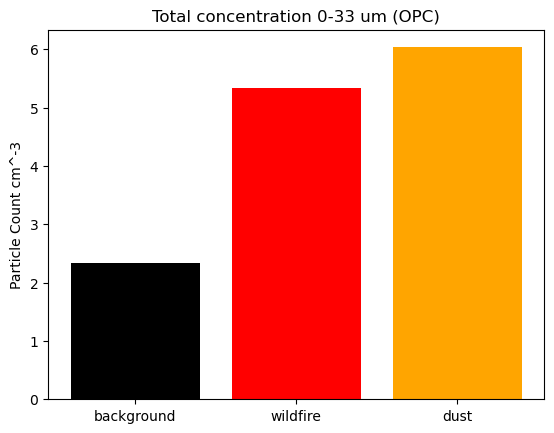

In [62]:
# OPC counts for days of interest
wf_N = opc.total_N_conc.sel(time=slice('2022-01-25T00:00:00.000000000','2022-01-29T00:00:00.000000000')).mean(dim='time').values
dust_N = opc.total_N_conc.sel(time=slice('2023-04-04T00:00:00.000000000','2023-04-06T00:00:00.000000000')).mean(dim='time').values
bkg_N = opc.total_N_conc.sel(time=slice('2022-01-03T00:00:00.000000000','2022-01-07T00:00:00.000000000')).mean(dim='time').values 

# Now compare the total concentrations across these events
x = ['background','wildfire','dust']
y = [bkg_N,wf_N,dust_N]
bar_colors = ['black', 'red', 'orange']
fig,ax = plt.subplots()
ax.bar(x, y,color=bar_colors)
plt.ylabel('Particle Count cm^-3')
plt.title('Total concentration 0-33 um (OPC)')